In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1000000000, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Alternatives'), 75, 21)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-22 to 2019-07-05 - 12


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

11


,len,mean,std,shrp,drawdown
Symbols,,,,,
XLRE,32,2.961341,1.577567,1.771508,4.835459
ICF,32,2.496001,1.567310,1.486199,4.991450
IYR,32,2.127995,1.541660,1.272218,4.963136
VNQ,32,2.142230,1.574928,1.254383,5.135487
REET,32,1.643327,1.224981,1.205456,3.361345
USRT,32,1.769587,1.529253,1.048172,5.198662
RWX,32,1.211958,1.055101,0.990703,1.910171
RWO,32,1.354881,1.223499,0.971161,3.132428
SCHH,32,1.547511,1.584915,0.871242,4.980762


evicted USRT 0.9378717477503832
evicted ICF 0.9364315899273649
evicted REET 0.8240365590885641
evicted VNQI 0.8998127828434609
retry backlogs ['RWR', 'VNQ', 'IYR', 'SCHH', 'RWO'] at 0.96
evicted VNQ 0.9573293288004647
evicted RWO 0.9165542916333441
evicted RWR 0.8466670725080306
retry backlogs ['IYR', 'SCHH'] at 0.97
evicted SCHH 0.8472499350242447
retry backlogs ['IYR'] at 0.98
evicted IYR 0.9730065900390208
{'RWX': 0.3, 'XLRE': 0.7}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,32.0,2.444746,1.249225,0.121260,1.687716,2.562586,3.118145,4.726138,1.823594,3.662572
XLRE,32.0,2.961341,1.577567,0.165063,1.610411,2.893063,3.888975,6.158118,1.771508,4.835459
RWX,32.0,1.211958,1.055101,-0.671137,0.284605,1.381736,1.964744,3.579730,0.990703,1.910171


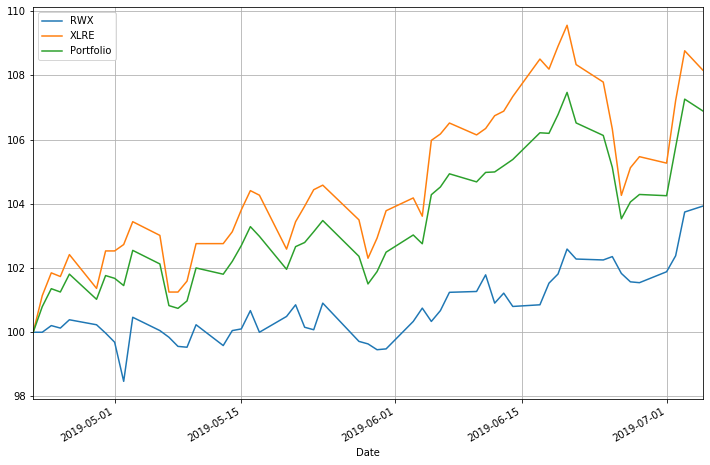

In [4]:
quote.setup_mask(stats.index)
ratio = quote.optimize_portfolio()
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)